In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [102]:
sells = pd.read_csv('data/Propiedades-0701.csv')
sells.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,e3cb52c36e2210586ddf90fd0443261ea2e5511f,2017-01-01,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.744616,-58.277365",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14mll_venta_casa_q...,Corredor Responsable: Martin Veltri - C.M.Q 80...,Casa en Venta Quilmes,https://thumbs4.properati.com/7/JUtDrSg4Bi2svp...
1,f1840b53eab0efe00661a89fb38a2c14bb159708,2017-01-01,sell,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.447378,-64.518655",...,185.0,NaN,702.702703,NaN,5.0,NaN,http://www.properati.com.ar/14mlv_venta_casa_p...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,Inverti! 2 Casas C/Pileta Carlos Paz,https://thumbs4.properati.com/6/6rEVlpVxiop3Bh...
2,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,43.0,NaN,2534.883721,NaN,1.0,NaN,http://www.properati.com.ar/14mm2_venta_depart...,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA,https://thumbs4.properati.com/7/q07Sye4wLYyM3m...
3,5a66865f29a02dbfa89d04ad66e91162c368eb99,2017-01-01,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,38.0,NaN,2365.789474,NaN,1.0,NaN,http://www.properati.com.ar/14mm3_venta_depart...,Corredor Responsable: Juan Carlos Treco - CUCI...,2 Ambientes / Monoambiente con balcon a estrenar,https://thumbs4.properati.com/8/HfKdACQrN2vqJi...
4,d8b7669f0f893c317da1ec56b8ccdc9cf3f43913,2017-01-01,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,...,193.0,NaN,4119.170984,NaN,NaN,NaN,http://www.properati.com.ar/14mn6_venta_casa_c...,Corredor Responsable: Edgardo Tamarit - CPCPI ...,VENDO CASA SAN VICENTE IDEAL PARA INVERSORES,https://thumbs4.properati.com/3/Ba8uKvp4bV5Pon...


In [48]:
# con esto borro una columna del dataframe (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
sells = sells.drop(sells.columns[[0, 2, 5, 6, 8, 9, 14, 18, 19, 20, 24, 25, 26]], axis=1) 

In [49]:
sells.head(100)

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,expenses,properati_url
0,2017-01-01,house,Quilmes,Bs.As. G.B.A. Zona Sur,-34.744616,-58.277365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14mll_venta_casa_q...
1,2017-01-01,house,Punilla,Córdoba,-31.447378,-64.518655,130000.0,USD,130000.00,NaN,185.0,5.0,NaN,http://www.properati.com.ar/14mlv_venta_casa_p...
2,2017-01-01,apartment,Villa Urquiza,Capital Federal,-34.579461,-58.477982,109000.0,USD,109000.00,NaN,43.0,1.0,NaN,http://www.properati.com.ar/14mm2_venta_depart...
3,2017-01-01,apartment,Villa Urquiza,Capital Federal,-34.579461,-58.477982,89900.0,USD,89900.00,NaN,38.0,1.0,NaN,http://www.properati.com.ar/14mm3_venta_depart...
4,2017-01-01,house,Córdoba,Córdoba,NaN,NaN,795000.0,ARS,48443.11,NaN,193.0,NaN,NaN,http://www.properati.com.ar/14mn6_venta_casa_c...
5,2017-01-01,apartment,San Telmo,Capital Federal,-34.622790,-58.377206,80000.0,USD,80000.00,NaN,47.0,3.0,NaN,http://www.properati.com.ar/14mo0_venta_depart...
6,2017-01-01,house,La Plata,Bs.As. G.B.A. Zona Sur,-34.925402,-57.913334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14moc_venta_casa_l...
7,2017-01-01,store,Centro / Microcentro,Capital Federal,-34.601819,-58.376713,200000.0,USD,200000.00,NaN,20.0,NaN,NaN,http://www.properati.com.ar/14moh_venta_local_...
8,2017-01-01,house,Río Ceballos,Córdoba,-31.163823,-64.326000,900000.0,ARS,54841.26,NaN,110.0,NaN,NaN,http://www.properati.com.ar/14moi_venta_casa_r...
9,2017-01-01,apartment,Morón,Bs.As. G.B.A. Zona Oeste,-34.644414,-58.622900,76000.0,USD,76000.00,NaN,50.0,2.0,NaN,http://www.properati.com.ar/14mox_venta_depart...


In [50]:
#uso regex para buscar coincidencias por string
sells_caba = sells.loc[sells['state_name'].str.contains(r'(Capital Federal|capital federal)')]
sells_caba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               21983
property_type            21983
place_name               21983
state_name               21983
lat                      19852
lon                      19852
price                    20159
currency                 20159
price_aprox_usd          20159
surface_total_in_m2      17030
surface_covered_in_m2    21069
rooms                    17772
expenses                  4034
properati_url            21983
dtype: int64

In [51]:
#filtro barrio Catalinas de caba
sells_caba = sells_caba[sells_caba['place_name']!='Catalinas']
sells_caba.count()

created_on               21981
property_type            21981
place_name               21981
state_name               21981
lat                      19850
lon                      19850
price                    20158
currency                 20158
price_aprox_usd          20158
surface_total_in_m2      17028
surface_covered_in_m2    21067
rooms                    17770
expenses                  4034
properati_url            21981
dtype: int64

In [53]:
#filtro barrio Capital Federal de caba
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
sells_caba.count()

created_on               21344
property_type            21344
place_name               21344
state_name               21344
lat                      19755
lon                      19755
price                    19564
currency                 19564
price_aprox_usd          19564
surface_total_in_m2      16472
surface_covered_in_m2    20480
rooms                    17716
expenses                  4023
properati_url            21344
dtype: int64

In [54]:
#uso regex para buscar coincidencias por string
sells_gba = sells.loc[sells['state_name'].str.contains(r'(G.B.A|Zona Norte|Zona Sur|Zona Este|Zona Oeste)')]
sells_gba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               32592
property_type            32592
place_name               32586
state_name               32592
lat                      24121
lon                      24121
price                    27557
currency                 27557
price_aprox_usd          27557
surface_total_in_m2      24409
surface_covered_in_m2    28922
rooms                    17680
expenses                  1935
properati_url            32592
dtype: int64

In [70]:
sells_caba_price = sells_caba.loc[:,['state_name','place_name','price_aprox_usd','surface_total_in_m2']]
sells_caba_price.head(10)

,state_name,place_name,price_aprox_usd,surface_total_in_m2
2,Capital Federal,Villa Urquiza,109000.0,NaN
3,Capital Federal,Villa Urquiza,89900.0,NaN
5,Capital Federal,San Telmo,80000.0,NaN
7,Capital Federal,Centro / Microcentro,200000.0,NaN
16,Capital Federal,Flores,170000.0,100.0
17,Capital Federal,Colegiales,320000.0,133.0
20,Capital Federal,Colegiales,379000.0,225.0
21,Capital Federal,Colegiales,490000.0,220.0
22,Capital Federal,Colegiales,187000.0,98.0
25,Capital Federal,Recoleta,295000.0,95.0


In [71]:
sells_caba_group = sells_caba_price.groupby("place_name")
sells_caba_group.mean()

,price_aprox_usd,surface_total_in_m2
place_name,,
Abasto,1.466321e+05,74.746667
Agronomía,1.555554e+05,88.166667
Almagro,1.711046e+05,79.583333
Balvanera,1.520413e+05,88.815657
Barracas,1.894031e+05,116.795139
Barrio Norte,3.006662e+05,106.403452
Belgrano,3.353222e+05,127.324607
Boca,1.435346e+05,111.390909
Boedo,4.490916e+05,48.080000


In [96]:
#defino cantidad de ventas por barrio
sells_caba_group_count = sells_caba_group.count()['state_name']
sells_caba_group_count.sort_values(ascending=False)

place_name
Palermo                 1872
Belgrano                1693
Caballito               1487
Recoleta                1054
Barrio Norte            1045
Almagro                  952
Flores                   881
Villa Urquiza            835
Boedo                    825
Villa Crespo             779
San Cristobal            573
Balvanera                548
Nuñez                    517
San Telmo                513
Monserrat                415
Puerto Madero            415
Floresta                 385
Villa Devoto             368
Barracas                 340
Mataderos                315
Saavedra                 292
Congreso                 288
Colegiales               273
Liniers                  269
Centro / Microcentro     248
Palermo Hollywood        247
Villa del Parque         245
San Nicolás              243
Palermo Soho             218
Villa Luro               203
Coghlan                  196
Retiro                   191
Palermo Chico            176
Constitución             175
Onc

In [72]:
#top 10 CABA promedio
sells_caba_sort_desc = sells_caba_group.mean().sort_values(by="price_aprox_usd", ascending=False)
sells_caba_sort_desc.head(10)

,price_aprox_usd,surface_total_in_m2
place_name,,
Palermo Chico,1.083807e+06,209.796512
Puerto Madero,8.977430e+05,147.517964
Boedo,4.490916e+05,48.080000
Recoleta,4.268494e+05,133.463134
San Cristobal,3.820352e+05,65.881319
Retiro,3.750865e+05,133.306122
Palermo Viejo,3.517349e+05,109.800000
Belgrano,3.353222e+05,127.324607
Palermo,3.334367e+05,107.399713


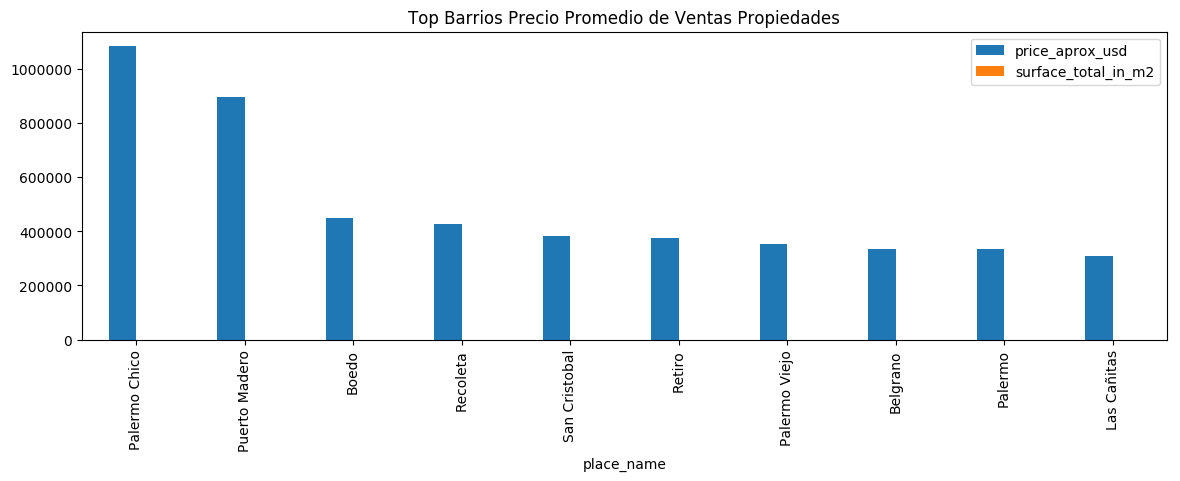

In [73]:
#top 10 CABA promedio
plt.figure()
plt.ylabel = "1"
sells_caba_sort_desc[0:10].plot(title = "Top Barrios Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [74]:
#TOP 10 CABA promedio Ascendente
sells_caba_sort_asc = sells_caba_group.mean().sort_values(by="price_aprox_usd", ascending=True)
sells_caba_sort_asc.head(10)

,price_aprox_usd,surface_total_in_m2
place_name,,
Villa Soldati,83412.872143,191.800000
Constitución,114404.819885,73.161538
Villa Riachuelo,130384.615385,204.333333
Villa Lugano,136120.926640,138.509091
Parque Avellaneda,138686.206897,124.809524
Paternal,139869.123382,81.990741
Boca,143534.597460,111.390909
Abasto,146632.142857,74.746667
Monserrat,150172.747846,117.133333


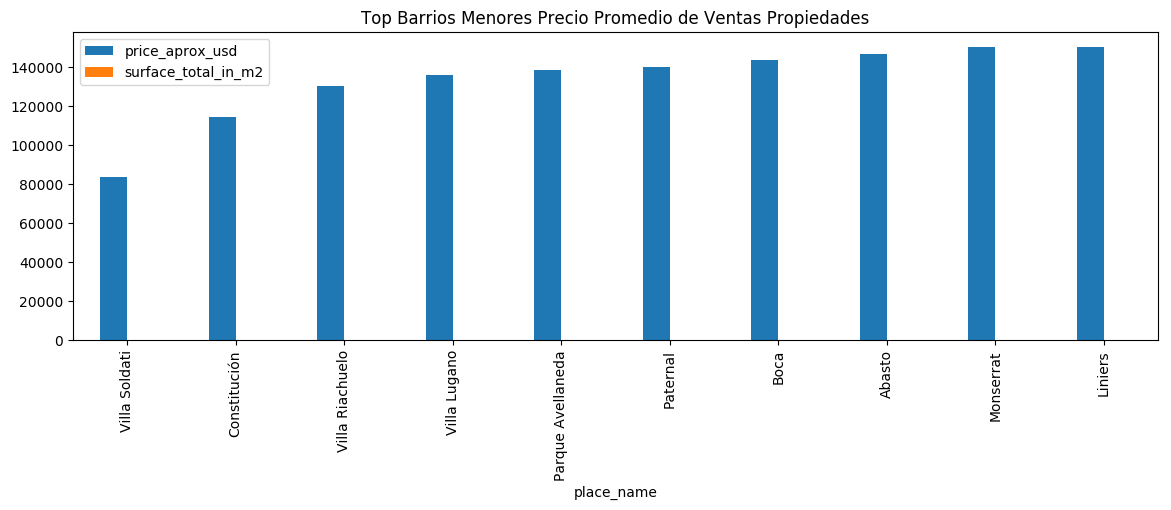

In [75]:
#top 10 CABA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_caba_sort_asc[0:10].plot(title = "Top Barrios Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [76]:
sells_gba_price = sells_gba.loc[:,['state_name','place_name','price_aprox_usd','surface_total_in_m2']]
sells_gba_price.head(10)

,state_name,place_name,price_aprox_usd,surface_total_in_m2
0,Bs.As. G.B.A. Zona Sur,Quilmes,NaN,NaN
6,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN
9,Bs.As. G.B.A. Zona Oeste,Morón,76000.0,NaN
10,Bs.As. G.B.A. Zona Norte,San Miguel,300000.0,NaN
11,Bs.As. G.B.A. Zona Sur,Lanús,120000.0,NaN
12,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN,45.0
13,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN,60.0
14,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN,80.0
26,Bs.As. G.B.A. Zona Norte,Martínez,170000.0,NaN
27,Bs.As. G.B.A. Zona Norte,Martínez,170000.0,70.0


In [77]:
sells_gba_group = sells_gba_price.groupby("place_name")
sells_gba_group.mean()

,price_aprox_usd,surface_total_in_m2
place_name,,
Country Maschwitz Club,296666.666667,305.800000
los alamos,81600.000000,51.000000
9 de Abril,NaN,1170.000000
Abasto,144000.000000,0.000000
Abril Club de Campo,627142.857143,704.300000
Acacias Blancas,256578.947368,305.187500
Acassuso,622232.718894,457.681818
Adrogué,282338.224568,126.000000
Aero Country Club,126500.000000,1027.000000


In [98]:
#defino cantidad de ventas por barrio
sells_gba_group_count = sells_gba_group.count()['state_name']
sells_gba_group_count.sort_values(ascending=False)

place_name
Nordelta                               2238
Tigre                                  1883
La Plata                               1742
Pilar                                  1559
Ramos Mejía                            1011
Olivos                                  974
Ituzaingó                               797
Morón                                   721
San Miguel                              707
Martínez                                693
San Isidro                              658
Benavidez                               649
Quilmes                                 607
San Fernando                            514
Vicente López                           480
Escobar                                 468
Haedo                                   446
Moreno                                  425
Caseros                                 413
Villa Ballester                         392
Florida                                 371
Victoria                                334
Los Pingüinos Country

In [78]:
#top 10 GBA promedio
sells_gba_sort_desc = sells_gba_group.mean().sort_values(by="price_aprox_usd", ascending=False)
sells_gba_sort_desc.head(10)

,price_aprox_usd,surface_total_in_m2
place_name,,
San Isidro Chico,1.850000e+06,400.000000
Barrio Cabos del Lago,1.207500e+06,554.000000
The Boating Club,1.200000e+06,NaN
Pacheco Golf Club,1.100000e+06,395.000000
Altos del Pilar,9.985714e+05,833.888889
Barrio Los Castores,9.590625e+05,365.714286
El Talar de Pacheco,9.550000e+05,401.571429
Los Pingüinos Country Club,9.250000e+05,756.274194
El Casco de Leloir,9.166667e+05,1675.666667


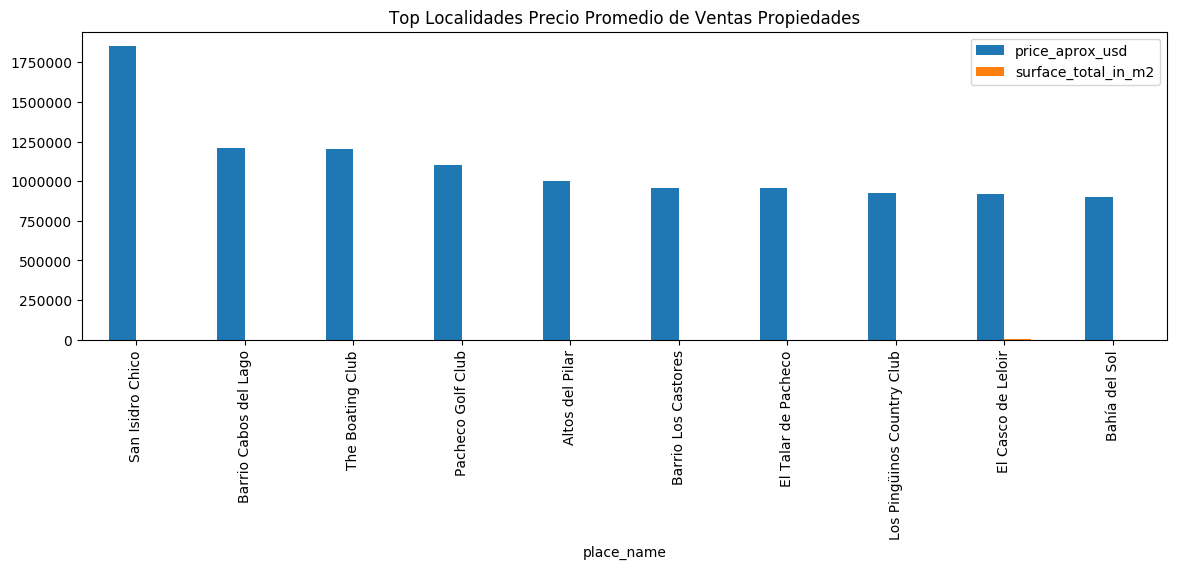

In [79]:
#top 10 GBA promedio
plt.figure()
plt.ylabel = "1"
sells_gba_sort_desc[0:10].plot(title = "Top Localidades Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [80]:
#top 10 GBA promedio Ascendente
sells_gba_sort_asc = sells_gba_group.mean().sort_values(by="price_aprox_usd", ascending=True)
sells_gba_sort_asc.head(10)

,price_aprox_usd,surface_total_in_m2
place_name,,
Don Orione,37108.110000,67.000000
San Miguel Oeste,39607.580000,141.500000
Cuartel V,41436.736667,186.750000
Mariano Acosta,42565.635000,NaN
Villa Coronel Zapiola,44803.585000,415.500000
González Catán,51915.044000,247.250000
San Alberto,52166.666667,125.125000
San Carlos,60309.590000,71.555556
Etcheverry,63706.160000,400.000000


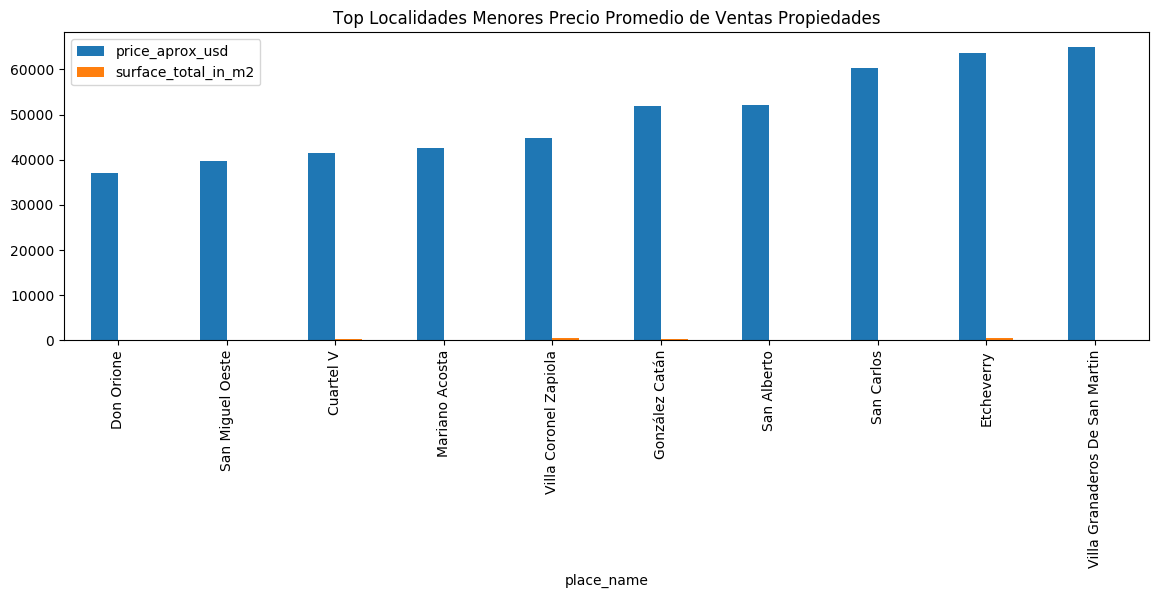

In [81]:
#top 10 GBA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_gba_sort_asc[0:10].plot(title = "Top Localidades Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [103]:
sells.columns.values

array(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'], dtype=object)